**SALES ANALYSIS USING PYTHON LIBRARIES**

Project statement:
AAL, established in 2000, is a well-known brand in Australia, particularly
recognized for its clothing business. It has opened branches in various states,
metropolises, and tier-1 and tier-2 cities across the country.
The brand caters to all age groups, from kids to the elderly.
Currently experiencing a surge in business, AAL is actively pursuing expansion
opportunities. To facilitate informed investment decisions, the CEO has assigned
the responsibility to the head of AAL’s sales and marketing (S&M) department.
The specific tasks include:
1) Identify the states that are generating the highest revenues.
2) Develop sales programs for states with lower revenues. The head of sales
and marketing has requested your assistance with this task.
Analyze the sales data of the company for the fourth quarter in Australia,
examining it on a state-by-state basis. Provide insights to assist the company in
making data-driven decisions for the upcoming year





In [ ]:
#import the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Create a pandas data frame and read the AusApparalSales4thQrt2020.csv file
df1 = pd.read_csv('AusApparalSales4thQrt2020.csv')

In [ ]:
#view the top 5 entities of the df
df1.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [ ]:
#get the basic info about the df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


**#1. Data wrangling**

In [ ]:

#a. Ensure that the data is clean and free from any missing or incorrect entries.
#○ Inspect the data manually to identify missing or incorrect information using the functions isna() and notna()
df1.isna().sum()



,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


In [ ]:
df1.notna().sum()

,0
Date,7560
Time,7560
State,7560
Group,7560
Unit,7560
Sales,7560


**OBSERVATION**

*  *It's observed that there are no columns with null/Nan values.*
* Unit ans Sales are the columns with numeric values.




In [ ]:
#Converting the 'Date' column to datetime delta.
df1['Date'] = pd.to_datetime(df1['Date'])


***Converted the dtype of column 'Date' into 'datetime***

<Axes: >

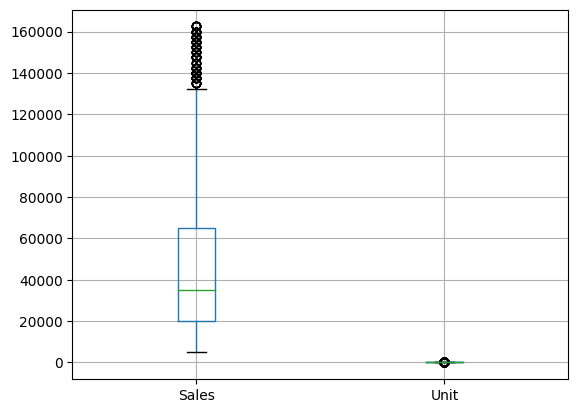

In [ ]:
df1.boxplot(column=['Sales','Unit'])

***Observation***:

*1.Since Value of Unit sold is much lower than the values of the Sales, the plotting of Sales and Units together will not be easy to understand.*

*2.So the values of these columns neeed to be Normalized to get a better visualization of the values.*

***Normalization of columns namely 'Unit' and 'Sales using MinMaxScaler() from Scikitlearn Library***

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Assign the columns "Unit" and "Sales" to the variable X
X=df1[['Unit','Sales']]
#Initiate the MinMaxScaler() using the variable Scaler.
scaler=MinMaxScaler()
#Normalize the valus of X using "scaler.fit_transform" method and asign it to X_Scaled.
#Xscaled as as result holds the array of Normalized values of Unit ans Sales.
X_scaled=scaler.fit_transform(X)
X_scaled


array([[0.0952381 , 0.0952381 ],
       [0.0952381 , 0.0952381 ],
       [0.03174603, 0.03174603],
       ...,
       [0.20634921, 0.20634921],
       [0.14285714, 0.14285714],
       [0.17460317, 0.17460317]])

In [ ]:
# Convert X_scaled to a DataFrame with appropriate column names
X_scaled_df = pd.DataFrame(X_scaled, columns=['scaled_Unit', 'scaled_Sales'])

# Concatenate the scaled data with the original DataFrame
df1_merged = pd.concat([df1, X_scaled_df], axis=1)

print(df1_merged)

           Date        Time State     Group  Unit  Sales  scaled_Unit  \
0    2020-10-01     Morning    WA      Kids     8  20000     0.095238   
1    2020-10-01     Morning    WA       Men     8  20000     0.095238   
2    2020-10-01     Morning    WA     Women     4  10000     0.031746   
3    2020-10-01     Morning    WA   Seniors    15  37500     0.206349   
4    2020-10-01   Afternoon    WA      Kids     3   7500     0.015873   
...         ...         ...   ...       ...   ...    ...          ...   
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000     0.190476   
7556 2020-12-30     Evening   TAS      Kids    15  37500     0.206349   
7557 2020-12-30     Evening   TAS       Men    15  37500     0.206349   
7558 2020-12-30     Evening   TAS     Women    11  27500     0.142857   
7559 2020-12-30     Evening   TAS   Seniors    13  32500     0.174603   

      scaled_Sales  
0         0.095238  
1         0.095238  
2         0.031746  
3         0.206349  
4         0.015873

In [ ]:
df1_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          7560 non-null   datetime64[ns]
 1   Time          7560 non-null   object        
 2   State         7560 non-null   object        
 3   Group         7560 non-null   object        
 4   Unit          7560 non-null   int64         
 5   Sales         7560 non-null   int64         
 6   scaled_Unit   7560 non-null   float64       
 7   scaled_Sales  7560 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 472.6+ KB


***2. Data analysis***

***a.Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.***

<Axes: >

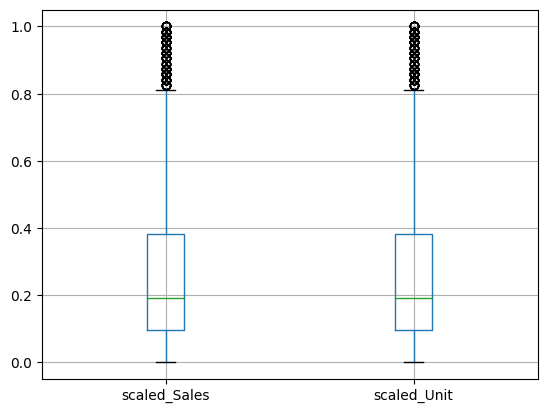

In [ ]:
#box plot of scaled values
df1_merged.boxplot(column=['scaled_Sales','scaled_Unit'])

***Observation:***
*1.The values of Scaled_Sales and scaled_Unit are almost similar as they are normalized using the formula*
**((X-min(X))/(max(X)-min(X))**

In [ ]:
 #descriptive statistics of 'Scaled_Sales & Scaled_Unit.
 df1_merged[['scaled_Unit','scaled_Sales']].describe()


,scaled_Unit,scaled_Sales
count,7560.000000,7560.000000
mean,0.254054,0.254054
std,0.204784,0.204784
min,0.000000,0.000000
25%,0.095238,0.095238
50%,0.190476,0.190476
75%,0.380952,0.380952
max,1.000000,1.000000


In [ ]:
#Median of Scaled_sales and Scaled_unit.
df1_merged[['scaled_Unit','scaled_Sales']].median()

,0
scaled_Unit,0.190476
scaled_Sales,0.190476


***Observation***


1.   *As both the Scaled_Unit and Scaled_Sales are the columns with Numeric Values, calculation of mode is not applicable.*
2.  *The basic discriptive statistics is given by the .describe() function.To calculate the median values of the .median() function is used *

***b. Identify the group with the highest sales and the group with the lowest sales based on the data provided***

In [ ]:
Sales_by_group=df1_merged.groupby('Group')['Sales'].agg([ 'min', 'max'])
Sales_by_group

,min,max
Group,,
Kids,5000,162500
Men,5000,160000
Seniors,5000,162500
Women,5000,162500


***c. Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted***

In [ ]:


# Weekly Report
df1_merged['Week'] = df1_merged['Date'].dt.isocalendar().week
weekly_sales = df1_merged.groupby('Week')['Sales'].sum()
print("The weekly sales is\n" ,weekly_sales)

# Monthly Report
df1_merged['Month'] = df1_merged['Date'].dt.month
monthly_sales = df1_merged.groupby('Month')['Sales'].sum()
print("\nMonthly Sales Report:\n",monthly_sales)
print(monthly_sales)

# Quarterly Report
df1_merged['Quarter'] = df1_merged['Date'].dt.quarter
quarterly_sales = df1_merged['Sales'].sum()
print("\nQuarterly Sales Report:\n")
print("Total Sales for the Quarter:", quarterly_sales)


The weekly sales is
 Week
40    15045000
41    27002500
42    26640000
43    26815000
44    21807500
45    20865000
46    21172500
47    21112500
48    21477500
49    29622500
50    31525000
51    31655000
52    31770000
53    13792500
Name: Sales, dtype: int64

Monthly Sales Report:
 Month
10    114290000
11     90682500
12    135330000
Name: Sales, dtype: int64
Month
10    114290000
11     90682500
12    135330000
Name: Sales, dtype: int64

Quarterly Sales Report:

Total Sales for the Quarter: 340302500


***3) Data visualization***

*a. Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters:*

*o State-wise sales analysis for different demographic groups (kids, women, men, and seniors).*

*o Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.*

*o Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. *

*This information aids in designing programs like hyper-personalization and Next Best Offersto enhance sales*

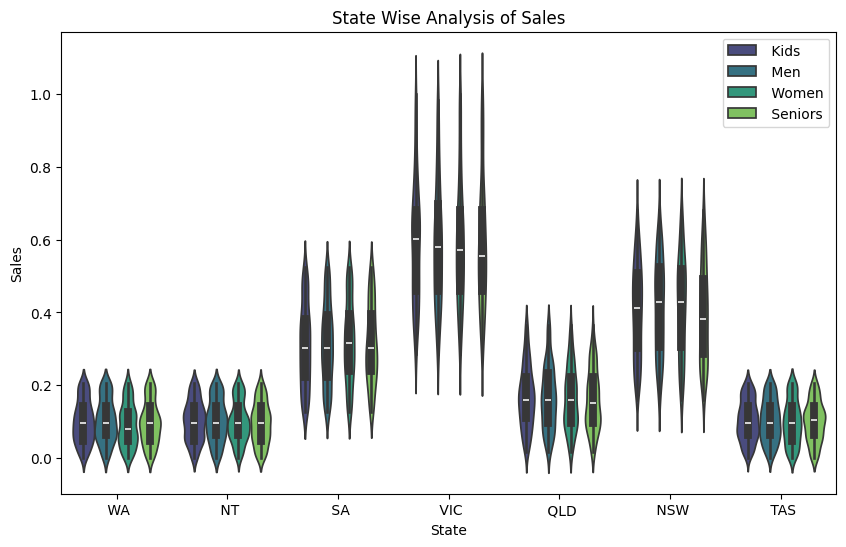

In [ ]:
#State-wise sales analysis for different demographic groups (kids, women, men, and seniors) using violin plot.
plt.figure(figsize=(10, 6))
sns.violinplot(x='State', y='scaled_Sales', hue='Group', data=df1_merged,palette='viridis')
plt.title('State Wise Analysis of Sales')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend()
plt.show()

***Observation***

*=> The highest  Sales is from the State 'VIC' and the lowest sales is from the state WA & NT*

*=> The Sales from the Group "Women' is higher in the states such as VIC,SA & NSW.*




In [ ]:
#creating a pivot table to analyse the group_wise sales across the states.
sales_pivot = df1_merged.pivot_table(index='State', columns='Group', values='scaled_Sales', aggfunc='sum')

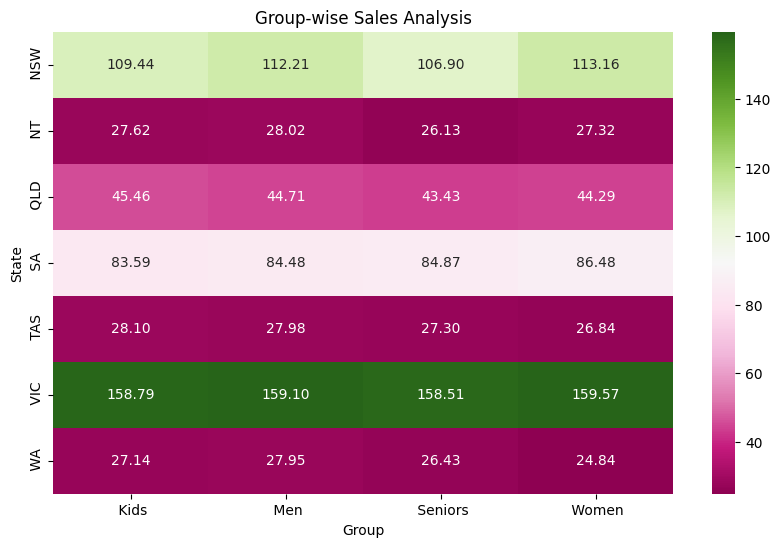

In [ ]:
# Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states using Heatmap.

plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot,annot=True,cmap='PiYG',fmt=".2f")
plt.title('Group-wise Sales Analysis')
plt.xlabel('Group')
plt.ylabel('State')
plt.show()

**Observation:**

*1. The States 'WA','NT','TAS', have the lowest sales numbers.*

*2.the highest Sales is from the VIC and the difference between sales from different groups is very miniscual.*

*3. if we analyse the groupwise sales across the individual states, we get to know about the target group in each state.*

 ***eg. WA has the highest sales from Men and Kids group***

 ***QLD and TAS has the highest sales from the Kids group vice versa. ***



<ipython-input-26-ecbd240c4125>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Time', y='scaled_Sales', data=df1_merged,palette='viridis')


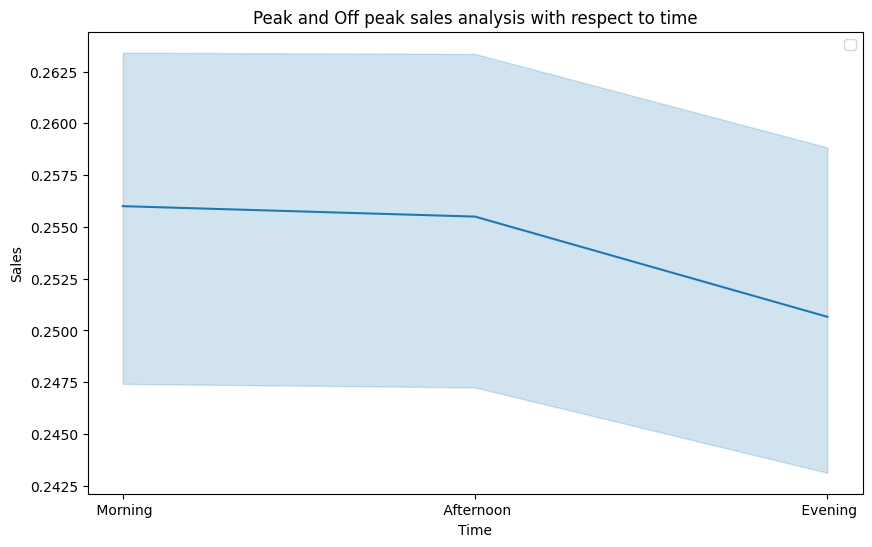

In [ ]:
#Time of the day analysis.
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='scaled_Sales', data=df1_merged,palette='viridis')
plt.title('Peak and Off peak sales analysis with respect to time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

**Observation:**


*The Sales is slightly higher during the afternoon time.(only a slight difference from the Morning sales).*

*The Sales gradually decreses as it reaches the evening time.*

*So Majority of the customers prefer Morning or Afternoon than evening.*

***b. Ensure the visualization is clear and accessible for effective Decision making by the head of sales and marketing (S&M).***

***The dashboard must contain daily, weekly, monthly, and quarterly charts ***

In [ ]:
df1_merged.head()

,Date,Time,State,Group,Unit,Sales,scaled_Unit,scaled_Sales,Week,Month,Quarter
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238,40,10,4
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238,40,10,4
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746,40,10,4
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349,40,10,4
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873,40,10,4


<ipython-input-43-ccc583b933fe>:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



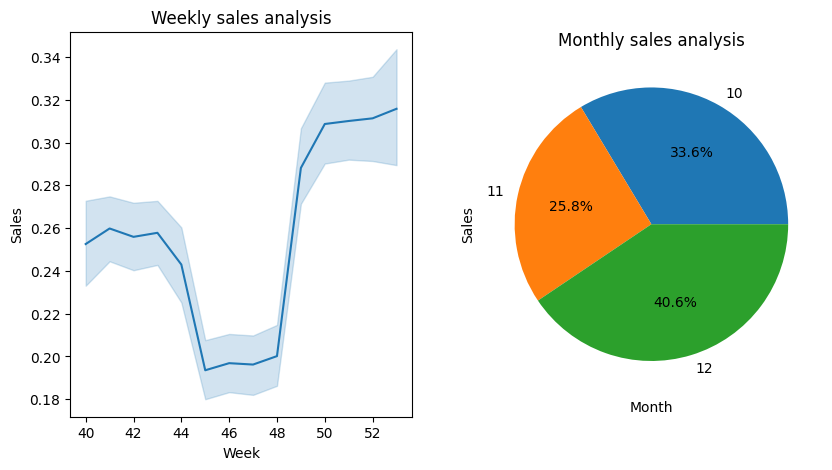

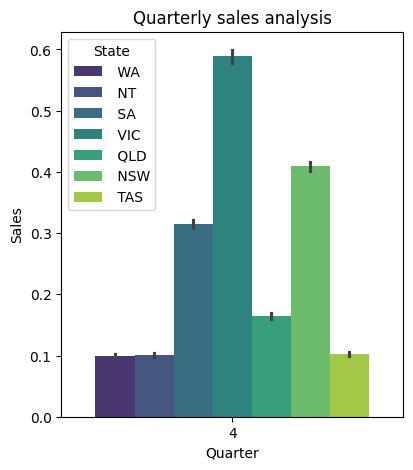

In [ ]:
#Sales Anlysis with respect to the week, month and the Quarter
#Weekly Sales analysis using line plot
plt.figure(figsize=(15, 5))
#create subplot with 1 row and 3 column to get a dashboard view.
plt.subplot(1,3,1)
sns.lineplot(x='Week',y='scaled_Sales',data=df1_merged,palette='Greens')
plt.title('Weekly sales analysis')
plt.xlabel('Week')
plt.ylabel('Sales')

#Monthly sales using pieplot
plt.figure
plt.subplot(1,3,2)
monthly_sales=df1_merged.groupby('Month')['scaled_Sales'].sum()
plt.pie(monthly_sales,labels=monthly_sales.index,autopct='%1.1f%%')
plt.title('Monthly sales analysis')
plt.xlabel('Month')
plt.ylabel('Sales')

#Quarterly sales with respect to the State
plt.figure(figsize=(15, 5))
plt.subplot(1,3,3)
sns.barplot(x='Quarter',y='scaled_Sales',data=df1_merged,hue='State',palette='viridis')
plt.title('Quarterly sales analysis')
plt.xlabel('Quarter')
plt.ylabel('Sales')

plt.show()

**Weekly Analysis** *: Used line plotfrom Seaborn analyse the peaks and downs of sales every week.*

**Monthly Analysis**: *Used pie chart from matplotlib to have a better analysis on the distribuition of sales every month.*

**Quarterly Sales**: *Represented it with a barplot to understand which state had good sales and which sales had the lowest sales. this will be helpful for the Marketing team change their strategy to bring more business.*

**Observation:**

*# As we can see in weekly Analysis from the week 44 to 47 the sales are at their lowest and  from 48 to 52 it raised drastically.*

*# As mentioned in the problem statement , the sales data of the Q4 (Oct -Dec) has been given here. So from week 48 to 52 has massive raise in Sales because of Christmas. *

*# It proves that Marketing Strategies need to built strong during no festival times to attract the customers and also to have a good business in all the months.*

**# The plot and the library I recommend is bar plot from plotly.**

 **Plotly lets us to hover through the data points which is an added advantage. we can zoom a particular set of data points. we can dowload the graph as png as well. in general it's equipped with great visualization tools for business purposes.**

 *The Anlaysis on the no of units sold from each Group in each state has done below for example using plotly.*

 *This will give a clear picture about the demand and Supply. eg.which Group category is doing more sales in each state and accordingly goods can be restocked or else put them to use in other state with good Sales.*

In [ ]:
#import plotly.
import plotly.express as px

In [ ]:
# Barplot to show number of units sold in every state which wil be helpful to understand whether to restock new/existing collection or not.

fig=px.bar(df1_merged,x='Unit',y='Group',color='State',title='Number of Units Sold Groupwise in Each State',
             labels={'Unit': 'Number of Units sold'})
fig.show()